<a href="https://colab.research.google.com/github/alphaczar/Deep-Learning/blob/master/Wild_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'cheetah'
file = 'cheetahs.txt'

In [6]:
folder = 'jaguar'
file = 'jaguars.txt'

In [10]:
folder = 'leopard'
file = 'leopards.txt'

In [11]:
path = Path('/content/drive/My Drive/wild_cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [15]:
path.ls()

[PosixPath('/content/drive/My Drive/wild_cats/jaguars.txt'),
 PosixPath('/content/drive/My Drive/wild_cats/cheetahs.txt'),
 PosixPath('/content/drive/My Drive/wild_cats/leopards.txt'),
 PosixPath('/content/drive/My Drive/wild_cats/cheetah'),
 PosixPath('/content/drive/My Drive/wild_cats/jaguar'),
 PosixPath('/content/drive/My Drive/wild_cats/leopard')]

***Downloading Images***


In [14]:
classes = ['cheetah','jaguar','leopard']

In [13]:
download_images(path/file, dest, max_pics=200)

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cheetah


jaguar


leopard


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['cheetah', 'jaguar', 'leopard']

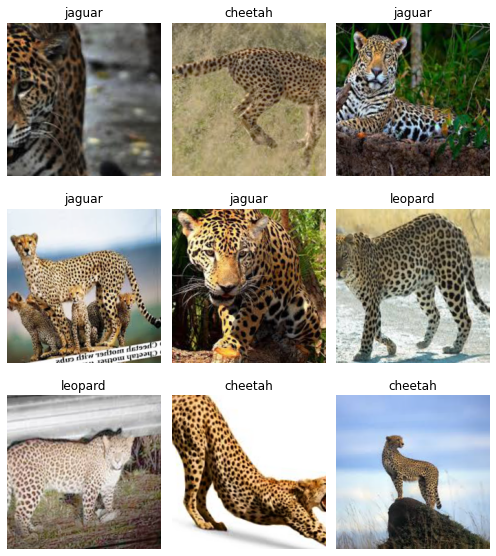

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 480, 120)

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.771605,0.835800,0.300000,00:10
1,1.179068,0.613803,0.166667,00:09
2,0.913430,0.566585,0.166667,00:09
3,0.772022,0.562436,0.183333,00:09


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [26]:
learn.save('stage-1')

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


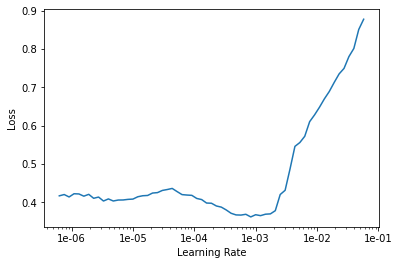

In [29]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(15, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.089176,0.550559,0.175000,00:09
1,0.077321,0.546778,0.166667,00:09
2,0.077723,0.558410,0.141667,00:09
3,0.072024,0.565915,0.141667,00:09
4,0.073699,0.584178,0.150000,00:09
5,0.072750,0.522985,0.141667,00:09
6,0.070742,0.654348,0.158333,00:09
7,0.068969,0.865829,0.191667,00:09
8,0.067009,1.064017,0.208333,00:09
9,0.064894,0.872882,0.183333,00:09


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [40]:
learn.save('stage-2')

In [41]:
learn.load('stage-2');

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


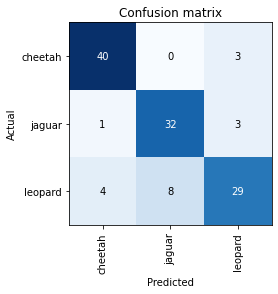

In [43]:
interp.plot_confusion_matrix()